# Introdução ao Firedrake  

&nbsp;

## Parte 2: Introdução de conceitos básicos de FEM

&nbsp;

Ministrante: **Diego Tavares Volpatto (LNCC/ESSS)**
&nbsp;

Encontro Acadêmico de Modelagem Computacional - XV EAMC (2022)

<tr>
<td> <img src="../img/logo_eamc.png" alt="Drawing" style="width: 200px;"/> </td>
<td> <img src="../img/banner.png" alt="Drawing" style="width: 550px;"/> </td>
</tr>

## Sumário

* Conceitos básicos de FEM utilizando o Firedrake
* Problema de Poisson em 1D e 2D
* Problema de Elasticidade Linear

# Conceitos básicos com Firedrake

## Conceitos básicos de FEM

Aqui veremos conceitos básicos de FEM essenciais para melhor entendimento de como usar o Firedrake. Em suma:

* Formas forte e fraca dos problemas
* Discretização espacial
* Aproximação das soluções (espaços de dimensão finita)

## Forma forte

Antes de mais nada, uma pequena ideia geral sobre FEM. Vamos considerar o seguinte problema-modelo:

Dado um conjunto aberto $\Omega \subset \mathbb{R}^n$ (com $n = 2$ ou $3$), encontrar $p \in C^2(\Omega)$ tal que:

\begin{equation}
\nabla \cdot (-K \nabla p) = f
\end{equation}

sendo $f: \Omega \to \mathbb{R}$ uma função conhecida. Vamos adotar condições de contorno genéricas: $p|_{\Gamma_D} = p_D$ e $(-K \nabla p)\cdot \mathbf{n} = g$ sobre $\Gamma_N$, sendo $\Gamma_D \cap \Gamma_N = \emptyset$ e $\Gamma_D \cup \Gamma_N \equiv \partial \Omega \subset \mathbb{R}^{n-1}$ o contorno de $\Omega$. 

Em geral, $K \in \mathbb{R}^{n \times n}$, mas simplificaremos: $K \in \mathbb{R}$.

A formulação do problema, em si, é também denominada de **Forma Forte**, que deve ser satisfeita ponto a ponto em $\Omega$.

## Forma fraca

A derivação clássica de FEM (método de Galerkin) consiste em:

\begin{equation}
\nabla \cdot (-K \nabla p) - f = 0
\end{equation}

\begin{equation}
\int_\Omega \left[\nabla \cdot (-K \nabla p) - f\right] v \,dx = 0
\end{equation}

\begin{equation}
-\int_\Omega v \nabla \cdot (K \nabla p) \,dx = \int_\Omega f\,v \,dx
\end{equation}

Utilizando integração por partes (identidade de Green):

\begin{equation}
\int_\Omega K \nabla p \nabla v \,dx = \int_\Omega f\,v \,dx + \int_{\Gamma_N} g\, v \,ds
\end{equation}

## Forma fraca

Dessa forma,

\begin{equation}
\int_\Omega K \nabla p \nabla v \,dx = \int_\Omega f\,v \,dx + \int_{\Gamma_N} g\, v \,ds
\end{equation}

No entanto, as funções devem ser definidas em algum **espaço de funções**. Ainda no espaço de dimensão infinita, temos que:

* $p \in \{p \in H^1(\Omega): p|_{\Gamma_D} = p_D\} =: \mathcal U$ $\to$ função candidata à solução.
* $v \in \{v \in H^1(\Omega): v|_{\Gamma_D} = 0\} =: \mathcal V$ $\to$ função-teste.

Além disso, $f \in L^2(\Omega)$.

## Formulação variacional abstrata

É interessante definir a formulação variacional a partir de formas bilineares, lineares e até multilineares. Para o Problema de Poisson:

\begin{equation}
a(p, v) := \int_\Omega K \nabla p \nabla v \,dx
\end{equation}

\begin{equation}
L(v) := \int_\Omega f\,v \,dx
\end{equation}

E o produto interno sobre $\Gamma_N$:

\begin{equation}
\langle g, v \rangle_{\Gamma_N} := \int_{\Gamma_N} g\, v \,ds
\end{equation}

Portanto: $a(p, v) = L(v) + \langle g, v \rangle_{\Gamma_N}$.

## Discretização espacial

Precisamos definir a discretização espacial do domínio para então termos onde calcular as soluções numéricas do problema.

Dessa forma, o domínio é particionado em elementos (geométricos e simples) tais que

\begin{equation}
\overline{\Omega} = \bigcup_{e = 1}^{N_e} T_e =: \mathcal{T}_h(\Omega)
\end{equation}

de forma que para $i \ne j$, $T_i \cap T_j$ seja (discretização conforme):

* Vazio;
* Um vértice;
* Uma aresta.

## Aproximação do Espaço de Funções: Espaços de Elementos Finitos

Os espaços $H^1$, $L^2$ e etc são espaços de dimensão infinita! Convenientemente vamos definir espaços de dimensão finita que se aproximem a esses espaços e satisfaçam os requerimentos de regularidade.

Dessa forma, temos espaços definidos por partes a nível de elemento (funções de suporte compacto). Por exemplo, polinômios definidos localmente nos elementos e seus nós.

Poderíamos considerar, por exemplo:

\begin{equation}
\mathcal{U}_h^k := \{p_h: p_h \in \mathcal{P}_k(T_e), \forall T_e \in \mathcal{T}_h(\Omega), p_h|_{\Gamma_D} = p_D\}
\end{equation}
\begin{equation}
\mathcal{P}_k(T) := \{p_h: p_h \text{ é um polinômio de grau} \le k \text{ em } T \in \mathcal{T}_h(\Omega) \}
\end{equation}

Logo, $\mathcal{U}_h^k \subset H^1(\Omega)$ com $k = 1$.

## Em resumo

Será necessário definir, no Firedrake, a famosa tripa da definição genérica de elementos finitos de Ciarlet:

1. A partição do seu domínio (discretização espacial): $\mathcal{T}_h$
2. A natureza das funções definidas a nível de elemento (shape functions, etc): $\mathcal{U}_h^k$, $\mathcal{V}_h^k$, etc
3. Os parâmetros que descrevem as funções discretizadas: os graus de liberdade.

Tudo isso precisaremos definir em código. Além disso, é claro, temos que escrever a forma fraca do problema.

## Leituras adicionais

Fiz apenas breves comentários de conceitos que serão utilizados nos códigos! Caso não tenha uma base teórica confortável em FEM e deseja ampliar, recomendo as seguintes literaturas introdutórias:

* [Numerical Solution of Partial Differential Equations by the Finite Element Method (Claes Johnson)](https://www.google.com.br/books/edition/Numerical_Solution_of_Partial_Differenti/PYXjyoqy5qMC?hl=pt-BR&gbpv=0)
* [Finite Elements, vol 1 (Oden e Carey)](https://www.google.com.br/books/edition/Finite_Elements/k8IXygEACAAJ?hl=pt-BR)
* [The Finite Element Method (Hughes)](https://www.google.com.br/books/edition/Finite_Elements/k8IXygEACAAJ?hl=pt-BR)
* [Understanding and Implementing the Finite Element Method (Gockenbach)](https://www.google.com.br/books/edition/Understanding_and_Implementing_the_Finit/stgyDwAAQBAJ?hl=pt-BR&gbpv=0)
* [(Gratuito e em Português) Introdução ao Método de Elementos Finitos (Mauro Rincon e I-Shih Liu)](http://www.im.ufrj.br/index.php/pt/estrutura/e-books-im/1452-introducao-ao-metodo-de-elementos-finitos)

# Problema de Poisson

## Recapitulando

### Forma forte

Encontrar $p \in C^2(\Omega)$ tal que:

\begin{equation}
\begin{cases}
  \nabla \cdot (-K \nabla p) = f & \text{em } \Omega \\[0.5em]
  p = p_D & \text{sobre } \Gamma_D \\[0.5em]
  (-K \nabla p)\cdot \mathbf{n} = g & \text{sobre } \Gamma_N
\end{cases}       
\end{equation}

### Forma fraca

Encontrar $p_h \in \mathcal{U}_h$ para todo $v \in \mathcal{V}_h$ tal que:

\begin{equation}
a(p_h, v) = L(v) + \langle g, v \rangle_{\Gamma_N}
\end{equation}

sendo

\begin{equation}
a(p, v) := \int_\Omega K \nabla p \nabla v \,dx \quad 
\end{equation}

\begin{equation}
L(v) := \int_\Omega f\,v \,dx
\end{equation}

## Implementando em Firedrake

Segue basicamente os seguintes passos:

1. Definição (ou leitura) da malha
2. Definição dos Espaços de Elementos Finito sobre a malha
3. Declaração das funções candidatas à solução e funções testes
4. Declaração de qualquer função adicional necessária (termos de fonte, coeficientes, etc)
5. Definição das condições de contorno fortes
6. Escrita da Formulação Variacional
7. Solucionamento do Problema Variacional
8. Coleta (ou visualização) dos resultados

Vamos considerar o caso 1D para compreensão dos conceitos.

### Importando o Firedrake

Antes de mais, é importante que você carregue as ferramentas que o Firedrake provê. Para que tudo fique disponível, simplesmente faça:

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # necessário para o Firedrake

from firedrake import *

### Definição da malha

Vamos considerar uma malha no intervalo unitário contendo 10 elementos

In [2]:
num_elements = 10
mesh = UnitIntervalMesh(num_elements)

Para informações detalhadas, consulte [aqui](https://www.firedrakeproject.org/variational-problems.html#constructing-meshes). Pode consultar as diversas funções convenientes na [documentação das APIs](https://www.firedrakeproject.org/firedrake.html?module-firedrake.mesh#module-firedrake.utility_meshes).

Todos os elementos da [Tabela Periódica de Elementos Finitos](https://www-users.cse.umn.edu/~arnold/femtable/) são suportados.

### Declaração do espaço de funções

Elementos Lagrangeanos Contínuos de grau `p = 1`:

In [3]:
p = 1  # Grau do polinômio
V = FunctionSpace(mesh, "CG", p)

Existe uma diversa possibilidade de escolha para os Espaços de Funções, por favor [verifique aqui](https://www.firedrakeproject.org/variational-problems.html#supported-finite-elements) a lista de todas as famílias de elementos disponíveis.

### Declaração das funções candidatas a solução e teste

Feitas simples e diretamente com:

In [4]:
p_h = TrialFunction(V)
v = TestFunction(V)

### Termo de fonte

No problema de Poisson, a única função adicional que estamos considerando é o termo de fonte. Vamos escolher um termo de fonte de forma a conhecermos a solução do problema ([Método das Soluções Manufaturadas](https://doi.org/10.1115/1.1436090)):

In [5]:
x, = SpatialCoordinate(mesh)
p_exact = sin(2 * pi * x)
exact_solution = Function(V).interpolate(p_exact)
exact_solution.rename("Exact solution", "label")

Adicionalmente, adotaremos $K = 1$ de agora em diante.

In [6]:
K = Constant(1)

Coletando os dados da solução para uma rápida visualização:

In [7]:
x_values = mesh.coordinates.vector().dat.data
exact_solution_values = exact_solution.vector().dat.data

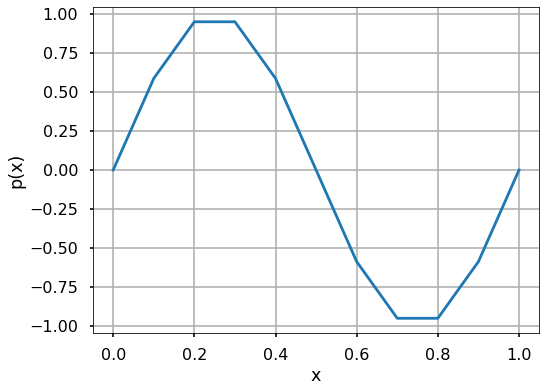

In [8]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-poster'])

plt.figure(figsize=(8, 6))

plt.plot(x_values, exact_solution_values)

plt.grid()
plt.xlabel("x")
plt.ylabel("p(x)")

plt.show()

Agora, finalmente, um primeiro contato com operadores da [UFL](https://fenics.readthedocs.io/projects/ufl/en/latest/manual/form_language.html):

In [9]:
f_expression = div(-K * grad(p_exact))
f = Function(V).interpolate(f_expression)

Dessa forma, definimos nosso termo-fonte a partir da forma forte do problema.

### Condições de Contorno essenciais

Vamos definir condições de contorno que são compatíveis com o termo de fonte:

In [10]:
boundary_value = 0.0
bc = DirichletBC(V, boundary_value, [1, 2])  # Fronteira 1 (esquerda) e Fronteira 2 (direita)

Note que, por simplicidade, toda a fronteira, neste exemplo, está sendo prescrita com condição de Dirichlet.

Caso tenha dúvidas sobre a função de condição de contorno, consulte:

In [11]:
help(DirichletBC)

Help on class DirichletBC in module firedrake.bcs:

class DirichletBC(BCBase, firedrake.adjoint.dirichletbc.DirichletBCMixin)
 |  DirichletBC(V, g, sub_domain, method=None)
 |  
 |  Implementation of a strong Dirichlet boundary condition.
 |  
 |  .. note:
 |  
 |     This uses facet markers in the domain, so may be used to
 |     applied strong boundary conditions to interior facets (if they
 |     have an appropriate mesh marker). The "on_boundary" string only
 |     applies to the exterior boundaries of the domain.
 |  
 |  :arg V: the :class:`.FunctionSpace` on which the boundary condition
 |      should be applied.
 |  :arg g: the boundary condition values. This can be a :class:`.Function` on
 |      ``V``, or a UFL expression that can be interpolated into
 |      ``V``, for example, a :class:`.Constant`, an iterable of
 |      literal constants (converted to a UFL expression), or a
 |      literal constant which can be pointwise evaluated at the nodes
 |      of ``V``.
 |  :arg s

### Formulação Variacional

Finalmente, o poder do Firedrake e UFL fica evidente na escrita facilitada da Formulação Variacional. Compare a escrita matemática com a codificação equivalente:

\begin{equation}
a(p_h, v) = L(v) + \langle g, v \rangle_{\Gamma_N}
\end{equation}

sendo

\begin{equation}
a(p, v) := \int_\Omega K \nabla p \nabla v \,dx \quad 
\end{equation}

\begin{equation}
L(v) := \int_\Omega f\,v \,dx
\end{equation}

In [12]:
a = inner(K * grad(p_h), grad(v)) * dx

L = f * v * dx

### Montando e solucionando o problema

E então, vamos montar o problema variacional e declarar a função onde a solução será armazenada.

\begin{equation}
a(p_h, v) = L(v)
\end{equation}

In [13]:
solution = Function(V)
poisson_problem = LinearVariationalProblem(a, L, solution, bcs=bc)

Temos que configurar os parâmetros do solver (`PETSc`). Optaremos pelo LU (método direto). Poderíamos também usar as configs default.

In [14]:
solver_parameters = {
    "ksp_type": "preonly",  # Vamos usar apenas o pré-condicionador
    "pc_type": "lu"  # A escolha do pré-condicionador
}

E agora, vamos construir o solver, que monta um sistema do tipo $Ax = b$:

In [15]:
poisson_solver = LinearVariationalSolver(poisson_problem, solver_parameters=solver_parameters)

No entanto, isso ainda não resolve o sistema resultante. Para tanto, basta executar:

In [16]:
poisson_solver.solve()

A sua solução agora está armazenada em `solution`. Você pode plotar ela com a função conveniente:

<Figure size 504x360 with 0 Axes>

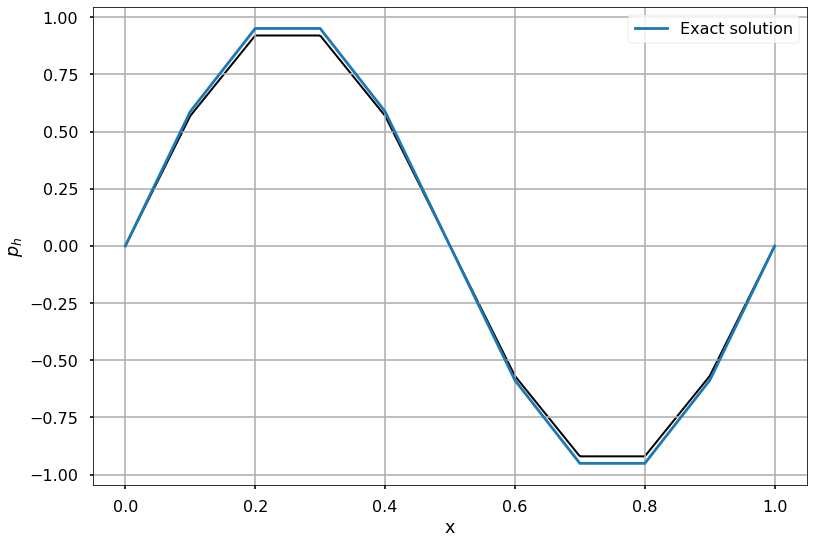

In [17]:
plt.figure(figsize=(7, 5))

plot(solution)
plt.plot(x_values, exact_solution_values, "-x", label="Exact solution")

plt.grid()
plt.legend(loc="best")

plt.xlabel("x")
plt.ylabel(r"$p_h$")

plt.show()

Se preferir, você também poderia coletar os resultados "na mão" para ter maior controle (como abaixo), mas esse trabalho fica bastante dificultado para problemas que não são 1D.

In [18]:
solution_values = solution.vector().dat.data

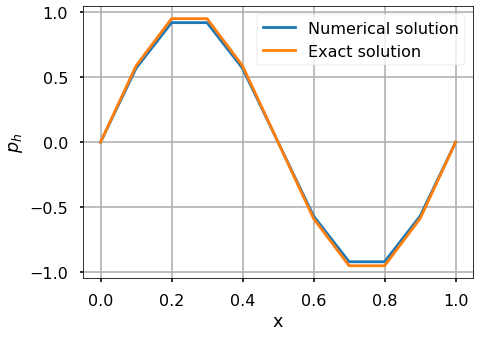

In [19]:
plt.figure(figsize=(7, 5))

plt.plot(x_values, solution_values, "-", label="Numerical solution")
plt.plot(x_values, exact_solution_values, "-x", label="Exact solution")

plt.grid()
plt.legend(loc="best")

plt.xlabel("x")
plt.ylabel(r"$p_h$")

plt.show()

## Resultado final

Por fim, podemos colocar todo o código junto, em um único script! Recomendo você tentar diferentes soluções manufaturadas!

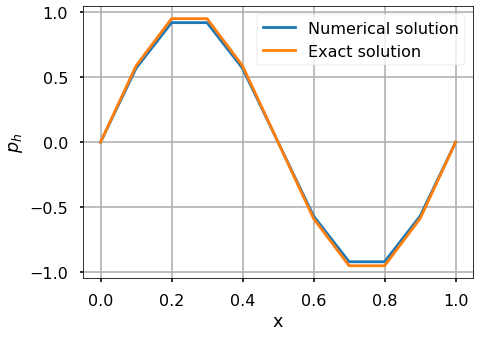

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # necessário para o Firedrake

from firedrake import *

# Definição da malha
num_elements = 10
mesh = UnitIntervalMesh(num_elements)

# Declaração do espaço de funções
p = 1  # Grau do polinômio
V = FunctionSpace(mesh, "CG", p)

# Funções trial e test
p_h = TrialFunction(V)
v = TestFunction(V)

# Parâmetros e termo de fonte
x, = SpatialCoordinate(mesh)
p_exact = sin(2 * pi * x)
exact_solution = Function(V).interpolate(p_exact)
exact_solution.rename("Exact solution", "label")
f_expression = div(-grad(p_exact))
f = Function(V).interpolate(f_expression)

# Coletando os valores do termo de fonte e coord. da malha
# em arrays da numpy
x_values = mesh.coordinates.vector().dat.data
exact_solution_values = exact_solution.vector().dat.data

# Condição de contorno de Dirichlet
boundary_value = 0.0
bc = DirichletBC(V, boundary_value, [1, 2])  # Fronteira 1 (esquerda) e Fronteira 2 (direita)

# Formulação variacional
a = inner(K * grad(p_h), grad(v)) * dx
L = f * v * dx

# Montando o problema variacional
solution = Function(V)
poisson_problem = LinearVariationalProblem(a, L, solution, bcs=bc)

# Montando o solver e solucionando o sistema resultante
solver_parameters = {
    "ksp_type": "preonly",  # Vamos usar apenas o pré-condicionador
    "pc_type": "lu"  # A escolha do pré-condicionador
}
poisson_solver = LinearVariationalSolver(poisson_problem, solver_parameters=solver_parameters)
poisson_solver.solve()

# Coletando e plotando os resultados
solution_values = solution.vector().dat.data

plt.figure(figsize=(7, 5))

plt.plot(x_values, solution_values, "-", label="Numerical solution")
plt.plot(x_values, exact_solution_values, "-x", label="Exact solution")

plt.grid()
plt.legend(loc="best")

plt.xlabel("x")
plt.ylabel(r"$p_h$")

plt.show()

## Extendendo para o Caso 2D

Algumas modificações/adaptações devem ser feitas. Notavelmente:

* Um domínio/malha 2D
* Uma solução manufaturada equivalente em 2D
* Condições de Contorno

Porém, é necessário redefinir quase tudo para propagar essas modificações.

### Definindo uma malha 2D

Vamos definir uma malha análoga. Note que podemos usar quadriláteros ou triângulos!

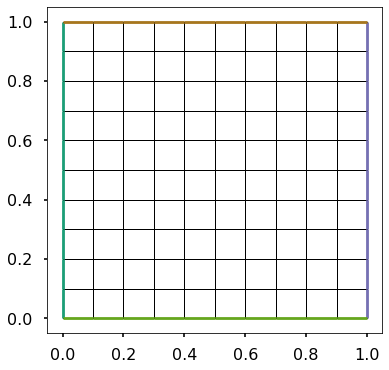

In [21]:
N = 10
use_quads = True
mesh = UnitSquareMesh(N, N, quadrilateral=use_quads)

fig, axes = plt.subplots(figsize=(6, 6))
triplot(mesh, axes=axes)
plt.show()

### Funções e seus Espaços

Direto ao ponto:

In [22]:
p = 1  # Grau do polinômio
V = FunctionSpace(mesh, "CG", p)

p_h = TrialFunction(V)
v = TestFunction(V)

### Definindo a solução manufaturada e o termo de fonte

Aqui, precisamos fazer algumas adaptações:

In [23]:
x, y = SpatialCoordinate(mesh)  # Essa é uma delas
p_exact = sin(2 * pi * x) * sin(2 * pi * y)  # Essa é outra

exact_solution = Function(V).interpolate(p_exact)
exact_solution.rename("Exact solution", "label")
f_expression = div(-grad(p_exact))
f = Function(V).interpolate(f_expression)

E mantemos:

In [24]:
K = Constant(1)

### Condições de Contorno

Praticamente se mantém da mesma forma, só temos que adicionar os novos contornos:

In [25]:
# Condição de contorno de Dirichlet
boundary_value = 0.0
bc = DirichletBC(V, boundary_value, "on_boundary")  # Fronteira 1 (esquerda), 2 (direita), 3 (inferior) e 4 (superior)

### Formulação Variacional, problema e solver

Todos são iguais a como eram no Caso 1D.

In [26]:
# Formulação variacional
a = inner(K * grad(p_h), grad(v)) * dx
L = f * v * dx

# Montando o problema variacional
solution = Function(V)
poisson_problem = LinearVariationalProblem(a, L, solution, bcs=bc)

# Montando o solver e solucionando o sistema resultante
solver_parameters = {
    "ksp_type": "preonly",  # Vamos usar apenas o pré-condicionador
    "pc_type": "lu"  # A escolha do pré-condicionador
}
poisson_solver = LinearVariationalSolver(poisson_problem, solver_parameters=solver_parameters)
poisson_solver.solve()

### Visualizando o resultado

Vamos checar visualmente o resultado e comparar com a solução exata.

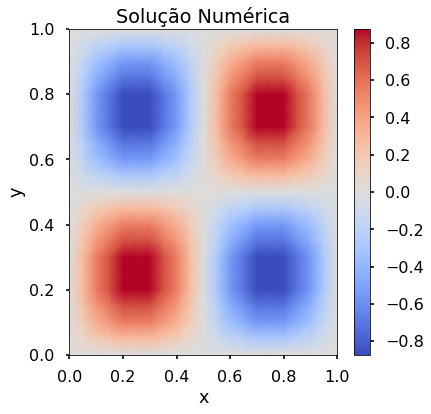

In [27]:
fig, axes = plt.subplots(figsize=(6, 6))
collection = tripcolor(solution, axes=axes, cmap='coolwarm')
fig.colorbar(collection)
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
plt.title("Solução Numérica")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

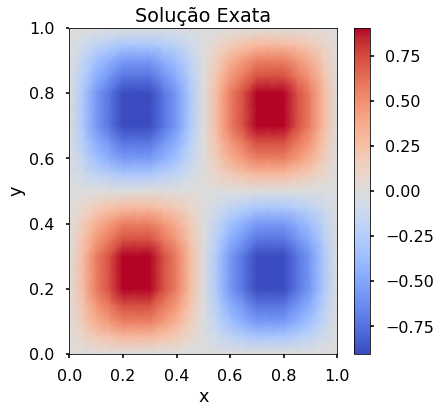

In [28]:
fig, axes = plt.subplots(figsize=(6, 6))
collection = tripcolor(exact_solution, axes=axes, cmap='coolwarm')
fig.colorbar(collection)
axes.set_xlim([0, 1])
axes.set_ylim([0, 1])
plt.title("Solução Exata")
plt.xlabel("x")
plt.ylabel("y")
plt.show()